In [12]:
import pandas as pd 
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder

# Text Classifier

In [13]:
df = pd.read_csv('all-data.csv',
                encoding='cp437',
                header=None,
                names=['sentiments','text'],
)
df

,sentiments,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [14]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['sentiments'])
df

,sentiments,text,y
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0


<Axes: >

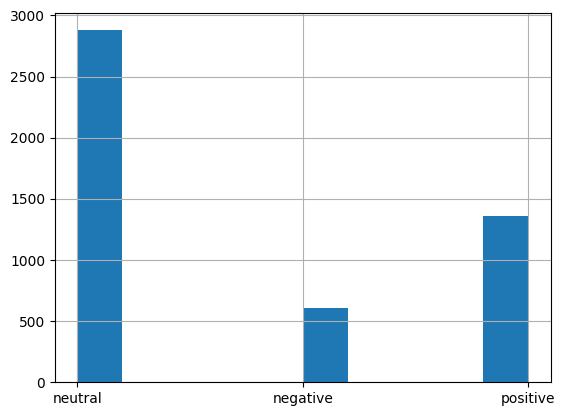

In [15]:
df.sentiments.hist()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
train_df, test_df = np.split(df.sample(frac=1), [int(len(df)*0.9)])

In [17]:
train_df.sentiments.value_counts()/len(train_df)

neutral     0.598028
positive    0.277001
negative    0.124971
Name: sentiments, dtype: float64

In [18]:
train_df['text'].values

array(['Talvivaara Mining Company PLC ( Talvivaara Mining ) ( LSE : TALV ) , a Finland-based nickel mining business , has installed its second production line at its metals recovery plant on June 9 , 2010 .',
       'By acquiring RCP , we can combine our strong knowhow with the expertise of a solid local company .',
       'New Delhi , Feb. 12 -- Korteniemi Anneli , Helokunnas Tuija , Peltola Marjo , Keskinen Jukka , Salminen Jussi , Tusa Kia and Janhonen Risto of Nokia Telecommunications Oy , Espoo , Finland have developed cable adjustment device .',
       ...,
       "Most of the permanent layoffs will be in the plywood and sawn timber sectors of the Finnish company 's operations at several domestic mills , where earlier this year it temporarily laid off some 1,200 workers to save costs .",
       'The appointments will be in force until the new CEO has been appointed .',
       'ASPO Plc STOCK EXCHANGE BULLETIN October 24 , 2006 at 2:00 p.m. Aspo Systems Division has completed the 

In [19]:
train_X = train_df['text'].values
train_Y = train_df['y'].values

In [20]:
len(train_X) , len(train_Y)

(4361, 4361)

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
train_X , train_Y = ros.fit_resample(train_X,train_Y)


ValueError: Expected 2D array, got 1D array instead:
array=['Talvivaara Mining Company PLC ( Talvivaara Mining ) ( LSE : TALV ) , a Finland-based nickel mining business , has installed its second production line at its metals recovery plant on June 9 , 2010 .'
 'By acquiring RCP , we can combine our strong knowhow with the expertise of a solid local company .'
 'New Delhi , Feb. 12 -- Korteniemi Anneli , Helokunnas Tuija , Peltola Marjo , Keskinen Jukka , Salminen Jussi , Tusa Kia and Janhonen Risto of Nokia Telecommunications Oy , Espoo , Finland have developed cable adjustment device .'
 ...
 "Most of the permanent layoffs will be in the plywood and sawn timber sectors of the Finnish company 's operations at several domestic mills , where earlier this year it temporarily laid off some 1,200 workers to save costs ."
 'The appointments will be in force until the new CEO has been appointed .'
 'ASPO Plc STOCK EXCHANGE BULLETIN October 24 , 2006 at 2:00 p.m. Aspo Systems Division has completed the statutory negotiations , as required under the Act on Co-Operation Within Undertakings , conducted as part of the action plan launched in August .'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming train_X contains your text data

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
train_X_tfidf = tfidf_vectorizer.fit_transform(train_X)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
train_X_resampled, train_Y_resampled = ros.fit_resample(train_X_tfidf, train_Y)


  (0, 217)	0.11456358616080856
  (0, 4754)	0.15161622526919707
  (0, 6101)	0.08426756784859017
  (0, 6543)	0.133919600030342
  (0, 7051)	0.21191944549979283
  (0, 5561)	0.19032825300826398
  (0, 1191)	0.09659497311524945
  (0, 5171)	0.14954677309932507
  (0, 6768)	0.13120631933696117
  (0, 7636)	0.14029368299208142
  (0, 4666)	0.17571837128929907
  (0, 4508)	0.20059690322267715
  (0, 4095)	0.08841217055081103
  (0, 1672)	0.11095968885827591
  (0, 5918)	0.1976547292377428
  (0, 1343)	0.13069392284669673
  (0, 3592)	0.10314622265431392
  (0, 8421)	0.24259800164644196
  (0, 5278)	0.23127545936932628
  (0, 6563)	0.14856685412682277
  (0, 2105)	0.07869891117729708
  (0, 5634)	0.5929641877132283
  (0, 8423)	0.37266437392125423


In [ ]:
data = np.hstack((train_X,train_Y))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.99, 
                                min_df = 2,
                                lowercase=True,
                                stop_words='english'
                                )

train_tf = tf_vectorizer.fit_transform(train_df['text'].values)

In [ ]:
tf_vectorizer.get_feature_names_out()
# train_tf

array(['00', '000', '01', ..., 'zinc', 'zone', 'ªm'], dtype=object)

In [ ]:
train_df.y

1408    1
394     1
267     2
2731    0
1482    2
       ..
1010    1
3794    1
4524    0
2604    1
926     2
Name: y, Length: 4361, dtype: int64

In [ ]:
train_tf

<4361x4309 sparse matrix of type '<class 'numpy.int64'>'
	with 46798 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', max_iter=500)
model.fit(train_tf,train_df['y'])

LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
test_tf = tf_vectorizer.transform(test_df['text'])
test_pred = model.predict(test_tf)
accuracy_score(test_df['y'],test_pred)

0.7257731958762886

## Stemming words
eg: jumping -> jump , flying -> fly

In [ ]:
import nltk
nltk.download('punkt')
# for stemming fucntionality


[nltk_data] Downloading package punkt to /home/haadif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
(df['text'][0])

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [ ]:
ps = PorterStemmer()
" ".join([ps.stem(word) for word in word_tokenize(df['text'][0])])

'accord to gran , the compani ha no plan to move all product to russia , although that is where the compani is grow .'

In [ ]:
stem_sentence = lambda text : " ".join([ps.stem(word) for word in word_tokenize(text)])
train_df['processed_text'] = train_df['text'].map(stem_sentence)
test_df['processed_text'] = test_df['text'].map(stem_sentence)

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.99, min_df = 2,
                                lowercase=True,
                                stop_words='english'
                                )
train_tf = tf_vectorizer.fit_transform(train_df['processed_text'].values)
train_tf.shape

(4361, 3480)

In [ ]:
tf_vectorizer.get_feature_names_out().reshape(-1,1)

array([['00'],
       ['000'],
       ['01'],
       ...,
       ['zinc'],
       ['zone'],
       ['ªm']], dtype=object)

## Ngrams

In [ ]:
tf_vectorizer = CountVectorizer(
    max_df=0.99, min_df=5,
    lowercase=True,
    stop_words='english',
    ngram_range=(1,2)
)
train_tf = tf_vectorizer.fit_transform(train_df['processed_text'].values)
train_tf.shape

(4361, 2514)

In [ ]:
[i for i in tf_vectorizer.get_feature_names_out()]

['00',
 '00 eet',
 '000',
 '000 correspond',
 '000 eur',
 '000 euro',
 '000 peopl',
 '000 period',
 '000 quarter',
 '000 sq',
 '000 squar',
 '000 tonn',
 '000 usd',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 000',
 '10 million',
 '10 mn',
 '10 percent',
 '100',
 '100 000',
 '100 index',
 '105',
 '11',
 '11 million',
 '11 mn',
 '12',
 '12 million',
 '12 month',
 '120',
 '13',
 '13 mn',
 '130',
 '14',
 '14 mn',
 '14 percent',
 '140',
 '15',
 '15 mln',
 '15 mn',
 '150',
 '16',
 '160',
 '17',
 '17 mn',
 '170',
 '18',
 '18 mn',
 '19',
 '20',
 '20 000',
 '20 mn',
 '200',
 '2000',
 '2001',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007 eur',
 '2007 group',
 '2008',
 '2008 compar',
 '2008 eur',
 '2008 finnish',
 '2009',
 '2009 eur',
 '2009 finnish',
 '2009 net',
 '2009 year',
 '2010',
 '2010 compani',
 '2010 eur',
 '2010 finnish',
 '2011',
 '2011 finnish',
 '2012',
 '2013',
 '21',
 '21 million',
 '21 mn',
 '22',
 '22 million',
 '23',
 '24',
 '25',
 '250',
 

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(df['text'].values[0])
print(doc)

for entity in doc.ents:
    print(entity.text, entity.label_)

2023-08-01 19:22:50.735839: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 19:22:50.757849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 19:22:50.873413: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 19:22:50.874291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 19:22:51.890557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Gran PERSON
Russia GPE


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
df['ents'] = df['text'].progress_map(lambda text: [(entity.text, entity.label_) for entity in nlp(text).ents])

  0%|          | 0/4846 [00:00<?, ?it/s]

In [ ]:
df.sample(5)

,sentiments,text,y,ents
668,positive,UPM-Kymmene is working closely with its shippi...,2,"[(UPM-Kymmene, ORG)]"
1243,neutral,However short-term rentals are becoming more p...,1,[]
559,positive,Uponor made an operating profit of EUR 151.0 m...,2,"[(Uponor, ORG), (EUR, ORG), (151.0, CARDINAL),..."
4213,negative,"Last year , UPM cut production , closed mills ...",0,"[(Last year, DATE), (UPM, ORG), (Finland, GPE)..."
1631,neutral,The event can also be viewed as a live audio w...,1,[]


In [ ]:
df['en_types'] = df['ents'].progress_map(lambda x : set(ent[1] for ent in x))

  0%|          | 0/4846 [00:00<?, ?it/s]

In [ ]:
df['en_types']

0                        {GPE, PERSON}
1                                {ORG}
2                      {CARDINAL, ORG}
3                                   {}
4                {DATE, PERCENT, NORP}
                     ...              
4841        {CARDINAL, DATE, GPE, ORG}
4842    {PERSON, CARDINAL, MONEY, ORG}
4843             {DATE, CARDINAL, ORG}
4844             {DATE, CARDINAL, ORG}
4845              {DATE, GPE, PERCENT}
Name: en_types, Length: 4846, dtype: object